16:46:20 - cmdstanpy - INFO - Chain [1] start processing
16:46:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


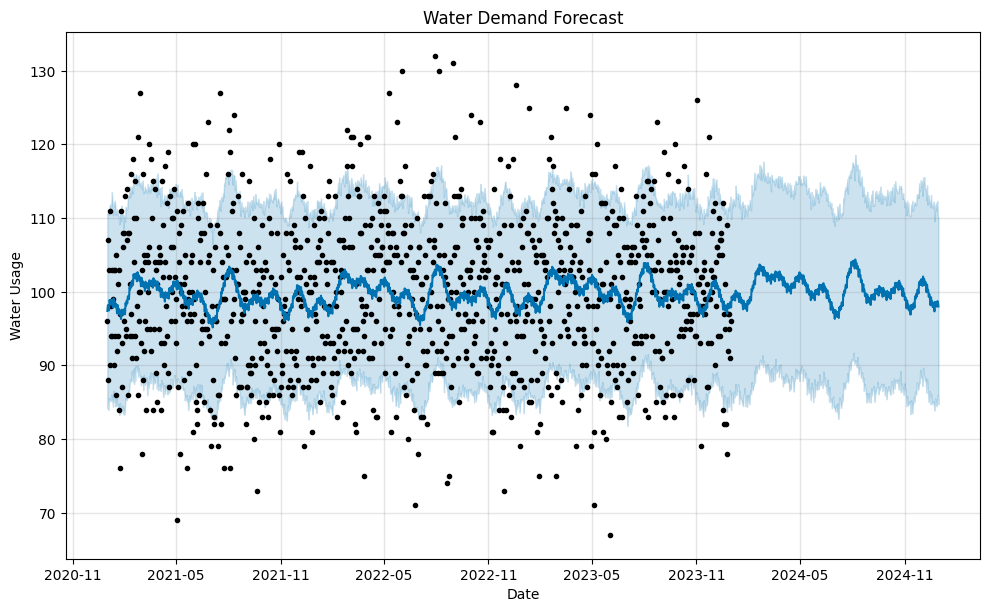

c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

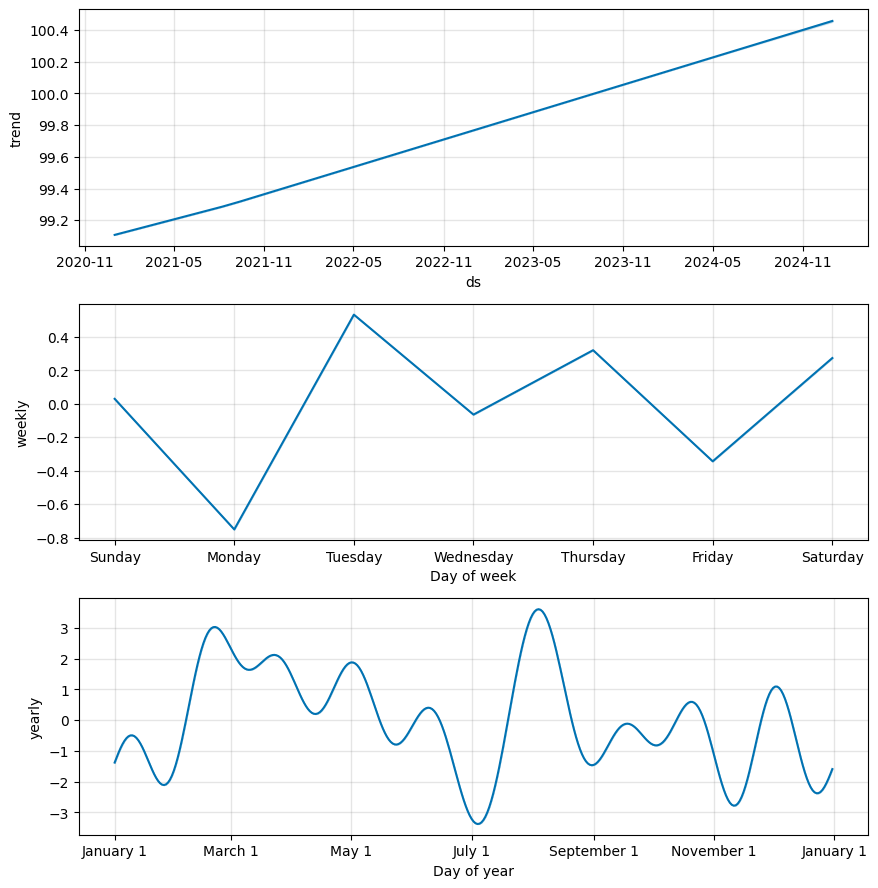

             ds       yhat  yhat_lower  yhat_upper
1455 2024-12-26  98.531635   84.749261  112.072168
1456 2024-12-27  97.971587   84.434935  111.121749
1457 2024-12-28  98.715418   85.956493  112.321180
1458 2024-12-29  98.616828   85.874259  110.179107
1459 2024-12-30  97.995311   84.732712  110.086619


In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Simulate historical water usage data
# For demonstration purposes, let's generate synthetic data
date_rng = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')
np.random.seed(42)
usage = np.random.poisson(lam=100, size=len(date_rng))

# Create DataFrame
data = pd.DataFrame(date_rng, columns=['date'])
data['usage'] = usage

# Rename columns for Prophet
data.rename(columns={'date': 'ds', 'usage': 'y'}, inplace=True)

# Initialize the model
model = Prophet()

# Fit the model on historical data
model.fit(data)

# Create a DataFrame to hold the future dates for prediction
future = model.make_future_dataframe(periods=365)  # Forecasting for the next year

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Water Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Water Usage')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Save the forecast data to a CSV file
forecast.to_csv('water_demand_forecast.csv', index=False)

# Print the last few rows of the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
